<a href="https://colab.research.google.com/github/silvesray/Homework/blob/master/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import glob
import warnings
import subprocess
import geopy
import re
from warnings import filterwarnings

In [2]:
## ============================= NOTEBOOK CONFIGURATION 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)


<b> Objective </b>



*   Analyze the Zomato dataset to get a fair idea about the factors affecting the aggregate rating of each restaurant , etablishment of different types of restaurant at differents places in more than 12,000 restaurants with restaurants serving from all over the world given that each one served the same food

* Identify which food is more popular in a locality

In [4]:
# ======================================================= DEFINITION DES CONSTANTES =============================================================
FOLDER_DRIVE = "drive/MyDrive/"
EXTENSION = ".csv"
TEST_SIZE = 0.4

In [5]:
files_csv = list(filter(os.path.isfile, glob.glob(f"{FOLDER_DRIVE}*{EXTENSION}", recursive=True)))
files_csv

['drive/MyDrive/zomato.csv']

In [6]:
def csv_file_length(fname):
    process = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, error = process.communicate()
    if process.returncode != 0:
        raise IOError(error)
    return int(result.strip().split()[0])
# ======================================================================

In [7]:
for fname in files_csv:
  random_rows_selection = csv_file_length(fname)
  print(f'Number of random rows in "{fname}" is:', random_rows_selection)

Number of random rows in "drive/MyDrive/zomato.csv" is: 71731


In [8]:
data = pd.read_csv(files_csv[0], sep=",")

In [9]:
print(f'data shape {data.shape}')

data shape (51717, 17)


In [10]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### DATA CLEANING

In [11]:
def retrieve_note(text):
  """ Retrieve a rating note of restaurant mark on 5 """
  text = str(text)
  text = re.sub("/\d+|([A-Z_-]+)","", text)
  return str(text).strip()

def remove_comma(text):
  """ Remove all comma appeared in digits due to another encoding """
  text = str(text)
  if text == "" or text == np.nan:
    return text
  return re.sub(",", "", text)

In [12]:
data["rate"] = data["rate"].apply(retrieve_note)
data.loc[data["rate"].isin(["", '']), "rate"] = "0"
data["rate"] = data["rate"].astype("float")
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].apply(remove_comma).astype("float")

### EXPLANATORY DATA ANALYSIS

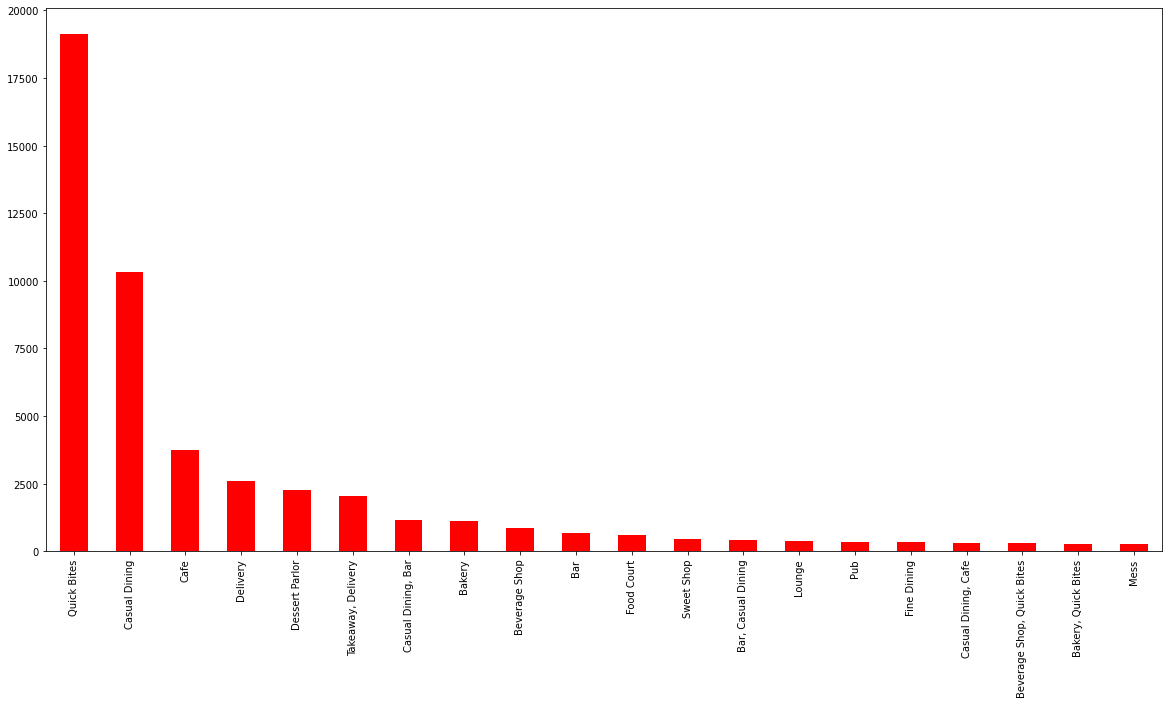

In [13]:
# restaurant type
plt.figure(figsize=(20, 10))
data["rest_type"].value_counts().nlargest(20).plot.bar(color="red")

In [14]:
from plotly import express as px

In [15]:
def mark(x):
  if x in ("Quick Bites", "Casual Dining"):
    return "Quick Bites + Casual Dining"
  else:
    return "others"

In [16]:
df = data.copy()
df["Top_Types"] = df["rest_type"].apply(mark)

dframe = df["Top_Types"].value_counts()
labels = dframe.index
values = dframe.values

In [17]:
px.pie(data_frame=dframe, names=labels, values=values)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [19]:
rest = data.groupby("name").agg({"votes": "sum", "url":"count", "approx_cost(for two people)": "mean", "rate": "mean"}).reset_index()
rest.columns = ["name", "total_votes", "total_unities", "avg_approx_cost", "avg_rating"]
rest["votes_per_unity"] = rest["total_votes"]/rest["total_unities"]
rest.head()

,name,total_votes,total_unities,avg_approx_cost,avg_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [20]:
import seaborn as sns

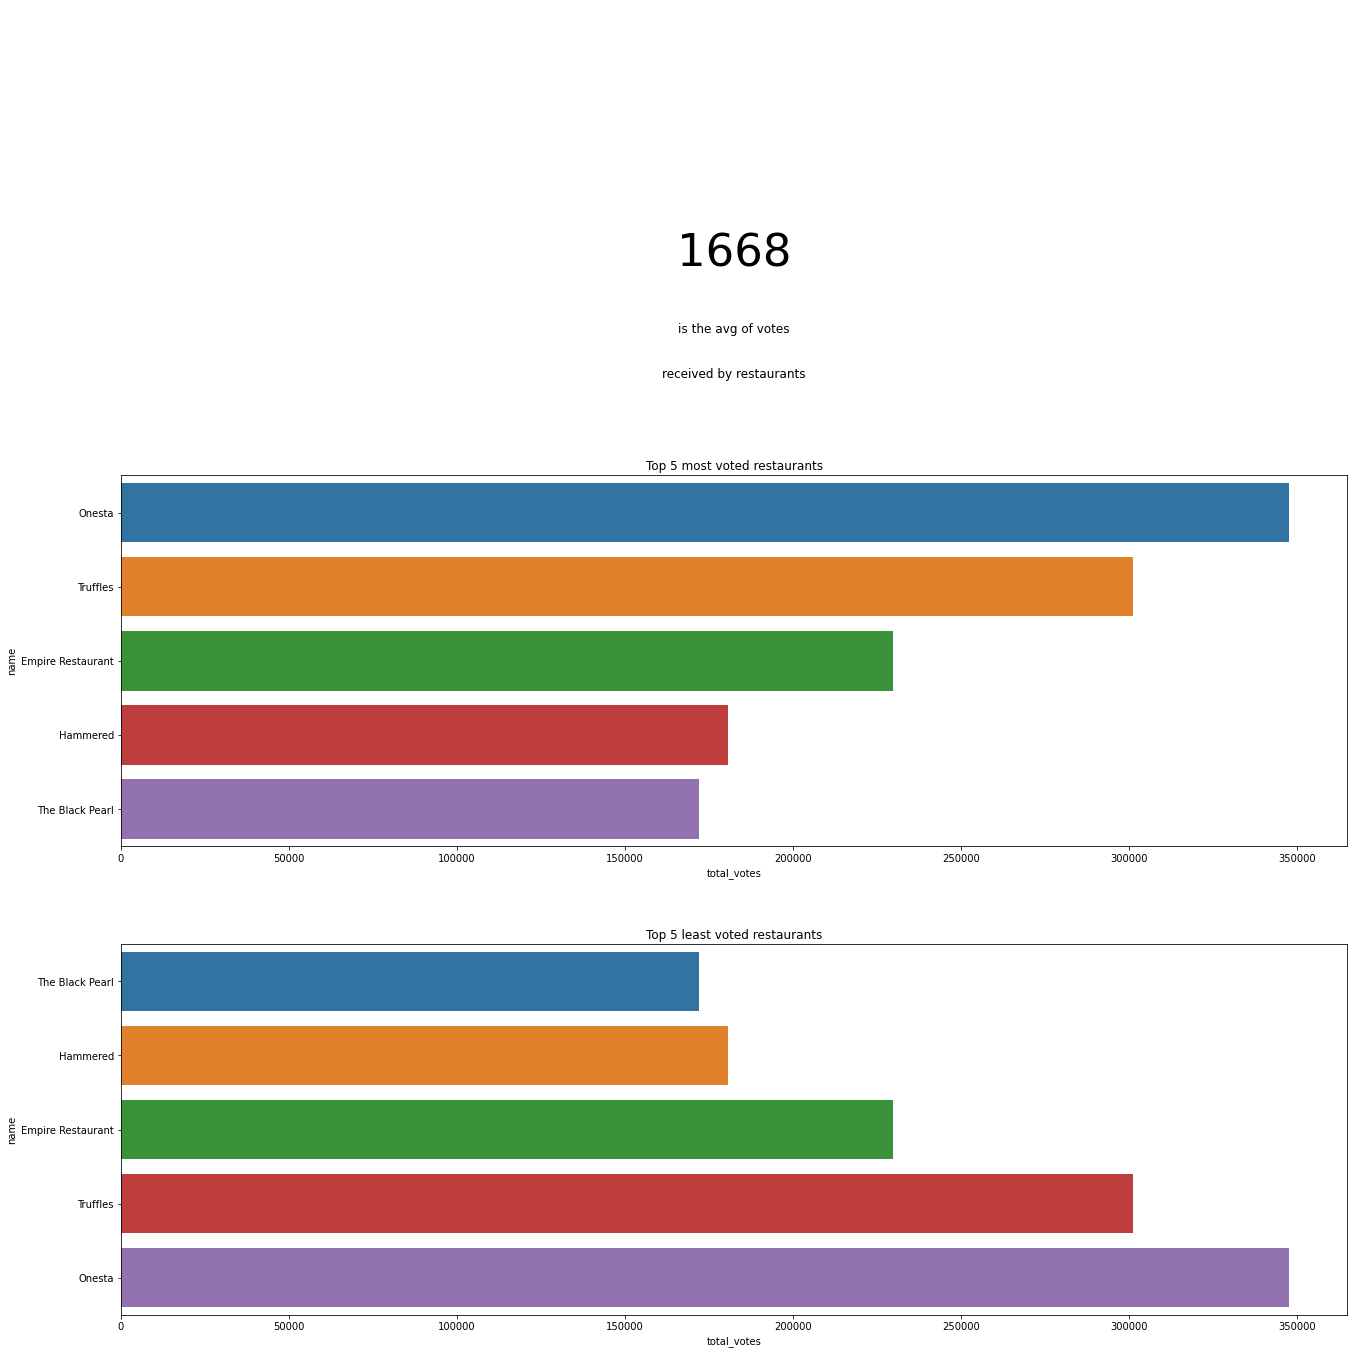

In [21]:
fig, (ax, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 20))

ax.text(0.5, 0.3, int(rest["total_votes"].mean()), fontsize=45, ha="center")
ax.text(0.5, 0.12, "is the avg of votes", fontsize=12, ha="center")
ax.text(0.5, 0.0, "received by restaurants", fontsize=12, ha="center")
ax.axis("off")

sns.barplot(x="total_votes", y="name", data=rest.sort_values(by="total_votes", ascending=False).head(5), ax=ax1)
ax1.set_title("Top 5 most voted restaurants")

sns.barplot(x="total_votes", y="name", data=rest.sort_values(by="total_votes").tail(5), ax=ax2)
ax2.set_title("Top 5 least voted restaurants")
fig.tight_layout(pad=5.0)

In [22]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [23]:
dframe = data["book_table"].value_counts()
labels = ["not book", "book"]
trace = go.Pie(labels=labels, values=dframe, hoverinfo="label+percent", textinfo="percent")
iplot([trace])

In [24]:
data["location"].nunique()

93

In [25]:
mask_btm = (data["approx_cost(for two people)"] <= 400) & (data["location"]=="BTM") & (data["rest_type"]=="Quick Bites") & (data["rate"] >=4.)

budget_btm = data[mask_btm]

budget_btm.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road
934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road
940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road
942,https://www.zomato.com/bangalore/roti-wala-btm...,"688, 7th Main, 10th Cross Main Road, 2nd Stage...",Roti Wala,Yes,No,4.0,197,+91 9731100002,BTM,Quick Bites,"Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...",North Indian,300.0,"[('Rated 5.0', 'RATED\n Well, I never had a c...",[],Delivery,Bannerghatta Road
954,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.1,464,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300.0,"[('Rated 4.0', ""RATED\n It's a great outlet t...",[],Delivery,Bannerghatta Road


In [26]:
budget_btm["name"].unique().tolist()

['Hiyar Majhe Kolkata',
 'Swadista Aahar',
 'Swad Punjab Da',
 'Roti Wala',
 'Litti Twist',
 'The Shawarma Shop',
 'Gorbandh',
 'Yum In My Tum',
 'Nanna Munna Paratha House',
 'Chaatimes',
 'Andhra Kitchen',
 "Muthashy's",
 'Ashirvaad Grand',
 'Petoo',
 'Ilyazsab The House Of Chicken',
 'Kannur Food Point',
 "Domino's Pizza",
 'KFC',
 'Hari Super Sandwich',
 'The Biriyani Pedia',
 'World Of Asia']

In [27]:
from ipywidgets import interact

In [28]:
@interact(location=data["location"].unique().tolist(), restaurant_type=data["rest_type"].unique().tolist())
def return_budget(location, restaurant_type):
  mask_btm = (data["approx_cost(for two people)"] <= 400) & (data["location"]==location) & (data["rest_type"]==restaurant_type) & (data["rate"] >=4.)
  budget_btm = data[mask_btm]
  return budget_btm["name"].unique()

interactive(children=(Dropdown(description='location', options=('Banashankari', 'Basavanagudi', 'Mysore Road',…

In [29]:
### Retrieve location of data
from geopy.geocoders import Nominatim

In [30]:
locations = pd.DataFrame({"Name": data["location"].unique()})
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
5,Rajarajeshwari Nagar
6,Vijay Nagar
7,Uttarahalli
8,JP Nagar
9,South Bangalore


In [31]:
lat = []
lon = []

geolocator = Nominatim(user_agent="app")
for location in locations["Name"]:
  location = geolocator.geocode(location)
  if location is None:
    lat.append(np.nan)
    lon.append(np.nan)
  else:
    lat.append(location.latitude)
    lon.append(location.longitude)  

locations["latitude"] = lat
locations["longitude"] = lon

In [32]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [33]:
rest_locations = data["location"].value_counts().reset_index()
rest_locations.columns = ["Name", "count"]
rest_locations

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
5,Indiranagar,2083
6,Jayanagar,1926
7,Marathahalli,1846
8,Bannerghatta Road,1630
9,Bellandur,1286


In [34]:
resto_locations = rest_locations.merge(locations, on="Name").dropna()
resto_locations.reset_index(inplace=True, drop=True)
resto_locations

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858
5,Indiranagar,2083,12.973291,77.640467
6,Jayanagar,1926,27.643927,83.052805
7,Marathahalli,1846,12.955257,77.698416
8,Bannerghatta Road,1630,12.887979,77.597081
9,Bellandur,1286,12.935772,77.666761


In [35]:
resto_locations.loc[75, "latitude"]

12.957998

In [36]:
import folium
from folium.plugins import HeatMap

In [37]:
basemap = folium.Map(location=[12.97, 77.59])
basemap

In [38]:
for i in range(resto_locations.shape[0]):
  folium.Marker(location=resto_locations.loc[i, ["latitude","longitude"]], popup=resto_locations.loc[i, "Name"]).add_to(basemap)

In [39]:
basemap

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
dframe = data.copy()
dframe["dish_liked"] = dframe["dish_liked"].apply(lambda r : str(r).lower())
dframe["rest_type"] = dframe["rest_type"].apply(lambda r : str(r).lower())
dframe["cuisines"] = dframe["cuisines"].apply(lambda r : str(r).lower())

#### DISPLAY DISHES LIKED ON TOP THREE  LOCATION

In [43]:
from operator import add
from functools import reduce
from wordcloud import WordCloud, STOPWORDS
import matplotlib
from matplotlib import pyplot as plt

In [44]:
top3 = ("BTM", "HSR", "Koramangala 5th Block")
rest_top3= dframe[dframe["location"].isin(top3)]
btm_resto = rest_top3[rest_top3["location"].isin([top3[0]])]
hsr_resto = rest_top3[rest_top3["location"].isin([top3[1]])]
kora_resto = rest_top3[rest_top3["location"].isin([top3[2]])]

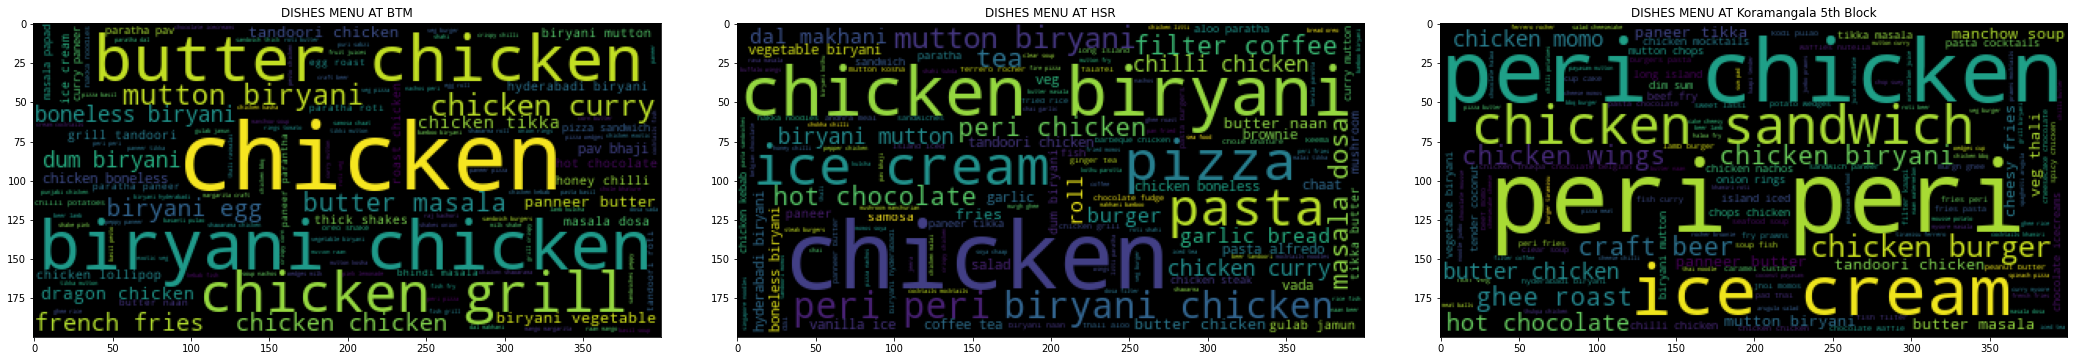

In [45]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(30, 40))

btm_dishes = btm_resto["dish_liked"].dropna().values
btm_dishes = reduce(add, btm_dishes)

hsr_dishes = hsr_resto["dish_liked"].dropna().values
hsr_dishes = reduce(add, hsr_dishes)

kora_dishes = kora_resto["dish_liked"].dropna().values
kora_dishes = reduce(add, kora_dishes)

btm_menu = WordCloud(stopwords=set(STOPWORDS)).generate(btm_dishes)
ax.imshow(btm_menu)
ax.set_title("DISHES MENU AT BTM")

hsr_menu = WordCloud(stopwords=set(STOPWORDS)).generate(hsr_dishes)
ax1.imshow(hsr_menu)
ax1.set_title("DISHES MENU AT HSR")

kora_menu = WordCloud(stopwords=set(STOPWORDS)).generate(kora_dishes)
ax2.imshow(kora_menu)
ax2.set_title("DISHES MENU AT Koramangala 5th Block")

fig.tight_layout(pad=5.0)
fig.show()

In [46]:
basemap2 = folium.Map()
top3_locations = resto_locations[resto_locations["Name"].isin(top3)]

for i in range(top3_locations.shape[0]):
  folium.Marker(location=top3_locations.loc[i, ["latitude","longitude"]], popup=top3_locations.loc[i, "Name"]).add_to(basemap2)

basemap2

In [47]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### FEATURE ENGINEERING

In [48]:
from functools import partial
import warnings
from warnings import filterwarnings

In [49]:
filterwarnings("ignore")

In [50]:
def count(text):
  text = str(text)
  return len(text.split(","))


def assign(x, threshold=0):
  if x > threshold:
    return 1
  else:
    return 0
  
def mark(x):
  if x in ("Quick Bites".lower(), "Casual Dining".lower()):
    return "Quick Bites + Casual Dining".lower()
  else:
    return "other"

In [51]:
dframe["total_cuisines"] = dframe["cuisines"].apply(count)
dframe["diversity_types"] = dframe["rest_type"].apply(count)
dframe["target"] = dframe["rate"].apply(partial(assign, threshold=3.75))
dframe["top_types"] = dframe["rest_type"].apply(mark)
dframe.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,diversity_types,target,top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,casual dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1,quick bites + casual dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,casual dining,"momos, lunch buffet, chocolate nirvana, thai g...","chinese, north indian, thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1,quick bites + casual dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"cafe, casual dining","churros, cannelloni, minestrone soup, hot choc...","cafe, mexican, italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1,other
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,quick bites,masala dosa,"south indian, north indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0,quick bites + casual dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,casual dining,"panipuri, gol gappe","north indian, rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,1,quick bites + casual dining


In [52]:
imp_features = dframe.columns.difference(
    ['url', 'address', 'name','rate', 'votes','top_types',
     'phone', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item'
     ])

df2 = dframe[imp_features]
df2.head()

,approx_cost(for two people),book_table,diversity_types,listed_in(city),listed_in(type),location,online_order,rest_type,target,total_cuisines
0,800.0,Yes,1,Banashankari,Buffet,Banashankari,Yes,casual dining,1,3
1,800.0,No,1,Banashankari,Buffet,Banashankari,Yes,casual dining,1,3
2,800.0,No,2,Banashankari,Buffet,Banashankari,Yes,"cafe, casual dining",1,3
3,300.0,No,1,Banashankari,Buffet,Banashankari,No,quick bites,0,2
4,600.0,No,1,Banashankari,Buffet,Basavanagudi,No,casual dining,1,2


In [53]:
cat_features = df2.select_dtypes(include="object").columns.tolist()
cat_features

['book_table',
 'listed_in(city)',
 'listed_in(type)',
 'location',
 'online_order',
 'rest_type']

In [54]:
num_features = df2.select_dtypes(exclude="object").columns.tolist()
num_features

['approx_cost(for two people)', 'diversity_types', 'target', 'total_cuisines']

In [55]:
for feature in cat_features :
  print(f"{feature} has total {df2[feature].nunique()} unique values")

book_table has total 2 unique values
listed_in(city) has total 30 unique values
listed_in(type) has total 7 unique values
location has total 93 unique values
online_order has total 2 unique values
rest_type has total 94 unique values


In [56]:
df2.isna().sum(), df2.shape

(approx_cost(for two people)    346
 book_table                       0
 diversity_types                  0
 listed_in(city)                  0
 listed_in(type)                  0
 location                        21
 online_order                     0
 rest_type                        0
 target                           0
 total_cuisines                   0
 dtype: int64, (51717, 10))

In [57]:
df2 = df2.dropna(how="any").reset_index(drop=True)
df2.head()

,approx_cost(for two people),book_table,diversity_types,listed_in(city),listed_in(type),location,online_order,rest_type,target,total_cuisines
0,800.0,Yes,1,Banashankari,Buffet,Banashankari,Yes,casual dining,1,3
1,800.0,No,1,Banashankari,Buffet,Banashankari,Yes,casual dining,1,3
2,800.0,No,2,Banashankari,Buffet,Banashankari,Yes,"cafe, casual dining",1,3
3,300.0,No,1,Banashankari,Buffet,Banashankari,No,quick bites,0,2
4,600.0,No,1,Banashankari,Buffet,Basavanagudi,No,casual dining,1,2


In [58]:
100 * df2["location"].value_counts()/len(data)

BTM                              9.857494
HSR                              4.849469
Koramangala 5th Block            4.797262
JP Nagar                         4.311928
Whitefield                       4.124369
Indiranagar                      3.940677
Jayanagar                        3.708645
Marathahalli                     3.536555
Bannerghatta Road                3.126631
Bellandur                        2.486610
Electronic City                  2.430535
Koramangala 1st Block            2.391863
Brigade Road                     2.355125
Koramangala 7th Block            2.273914
Koramangala 6th Block            2.212039
Sarjapur Road                    2.039948
Koramangala 4th Block            1.966471
Ulsoor                           1.966471
Banashankari                     1.751842
MG Road                          1.728639
Kalyan Nagar                     1.643560
Richmond Road                    1.554615
Malleshwaram                     1.399927
Frazer Town                      1

In [59]:
threshold = 0.6
values = 100 * df2["location"].value_counts()/len(data)
values = values[values > threshold]
values.index

Index(['BTM', 'HSR', 'Koramangala 5th Block', 'JP Nagar', 'Whitefield',
       'Indiranagar', 'Jayanagar', 'Marathahalli', 'Bannerghatta Road',
       'Bellandur', 'Electronic City', 'Koramangala 1st Block', 'Brigade Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Sarjapur Road',
       'Koramangala 4th Block', 'Ulsoor', 'Banashankari', 'MG Road',
       'Kalyan Nagar', 'Richmond Road', 'Malleshwaram', 'Frazer Town',
       'Basavanagudi', 'Residency Road', 'Brookefield', 'Banaswadi',
       'New BEL Road', 'Kammanahalli', 'Rajajinagar', 'Church Street',
       'Lavelle Road', 'Shanti Nagar', 'Shivajinagar', 'Cunningham Road',
       'Domlur', 'Old Airport Road', 'Ejipura', 'Commercial Street',
       'St. Marks Road'],
      dtype='object')

In [60]:
def transform(x, values):
  if x in values:
    return x
  else:
    return "other"

In [61]:
threshold2 = 1.5
values2 = 100 * df2["rest_type"].value_counts()/len(data)
values2 = values2[values2 > threshold2]
values2

quick bites           36.831216
casual dining         19.867742
cafe                   7.129184
delivery               5.002224
dessert parlor         4.340932
takeaway, delivery     3.898138
bakery                 2.206238
casual dining, bar     2.196570
beverage shop          1.676431
Name: rest_type, dtype: float64

In [62]:
df2["location"] = df2["location"].apply(partial(transform, values=values.index))
df2["rest_type"] = df2["rest_type"].apply(partial(transform, values=values2.index))

In [63]:
for feature in cat_features :
  print(f"{feature} has total {df2[feature].nunique()} unique values")

book_table has total 2 unique values
listed_in(city) has total 30 unique values
listed_in(type) has total 7 unique values
location has total 42 unique values
online_order has total 2 unique values
rest_type has total 10 unique values


In [64]:
data_cat = df2[cat_features]
data_num = df2[num_features]

In [65]:
for col in cat_features:
  col_encoded = pd.get_dummies(df2[col], prefix=col, drop_first=True)
  data_cat = pd.concat([data_cat, col_encoded], axis=1)
  data_cat.drop(col, axis=1, inplace=True)

In [66]:
data_final = pd.concat([df2.loc[:, num_features] , data_cat], axis=1)

data_final.head()

,approx_cost(for two people),diversity_types,target,total_cuisines,book_table_Yes,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,listed_in(city)_Brigade Road,listed_in(city)_Brookefield,listed_in(city)_Church Street,listed_in(city)_Electronic City,listed_in(city)_Frazer Town,listed_in(city)_HSR,listed_in(city)_Indiranagar,listed_in(city)_JP Nagar,listed_in(city)_Jayanagar,listed_in(city)_Kalyan Nagar,listed_in(city)_Kammanahalli,listed_in(city)_Koramangala 4th Block,listed_in(city)_Koramangala 5th Block,listed_in(city)_Koramangala 6th Block,listed_in(city)_Koramangala 7th Block,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,location_Commercial Street,location_Cunningham Road,location_Domlur,location_Ejipura,location_Electronic City,location_Frazer Town,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Kalyan Nagar,location_Kammanahalli,location_Koramangala 1st Block,location_Koramangala 4th Block,location_Koramangala 5th Block,location_Koramangala 6th Block,location_Koramangala 7th Block,location_Lavelle Road,location_MG Road,location_Malleshwaram,location_Marathahalli,location_New BEL Road,location_Old Airport Road,location_Rajajinagar,location_Residency Road,location_Richmond Road,location_Sarjapur Road,location_Shanti Nagar,location_Shivajinagar,location_St. Marks Road,location_Ulsoor,location_Whitefield,location_other,online_order_Yes,rest_type_beverage shop,rest_type_cafe,rest_type_casual dining,"rest_type_casual dining, bar",rest_type_delivery,rest_type_dessert parlor,rest_type_other,rest_type_quick bites,"rest_type_takeaway, delivery"
0,800.0,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,800.0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,800.0,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,300.0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,600.0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
label = data_final["target"]
matrix = data_final[data_final.columns.difference(["target", "approx_cost(for two people)"])]

### FEATURES SELECTION

#### IMPORTANCE VARIABLES

In [68]:
!pip install eli5

In [69]:
!pip install lime

     |████████████████████████████████| 275 kB 4.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=06dfe1a274b94512719677f5977e56050b6d82b81ccda572211f2d7c064b9f8a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [70]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
import lime

In [71]:
SEED = 42
TEST_SIZE = 0.4
columns = ["listed_in(city)_Lavelle Road", "listed_in(city)_MG Road", "listed_in(city)_Residency Road", 
           "listed_in(city)_Whitefield", "listed_in(city)_New BEL Road", "listed_in(city)_Sarjapur Road",
           "listed_in(city)_Old Airport Road", "location_Koramangala 6th Block", "listed_in(city)_Rajajinagar",
           "listed_in(city)_Malleshwaram", "listed_in(city)_Koramangala 6th Block", "listed_in(city)_Koramangala 7th Block",
           "listed_in(city)_Marathahalli"]

In [72]:
matrix = matrix[matrix.columns.difference(columns)]

x_train, x_dev_test, y_train, y_dev_test = train_test_split(matrix, label, test_size=TEST_SIZE, random_state=SEED, stratify=label)

x_val, x_test ,y_val, y_test = train_test_split(x_dev_test, y_dev_test, random_state=SEED, test_size=TEST_SIZE/2, stratify=y_dev_test)

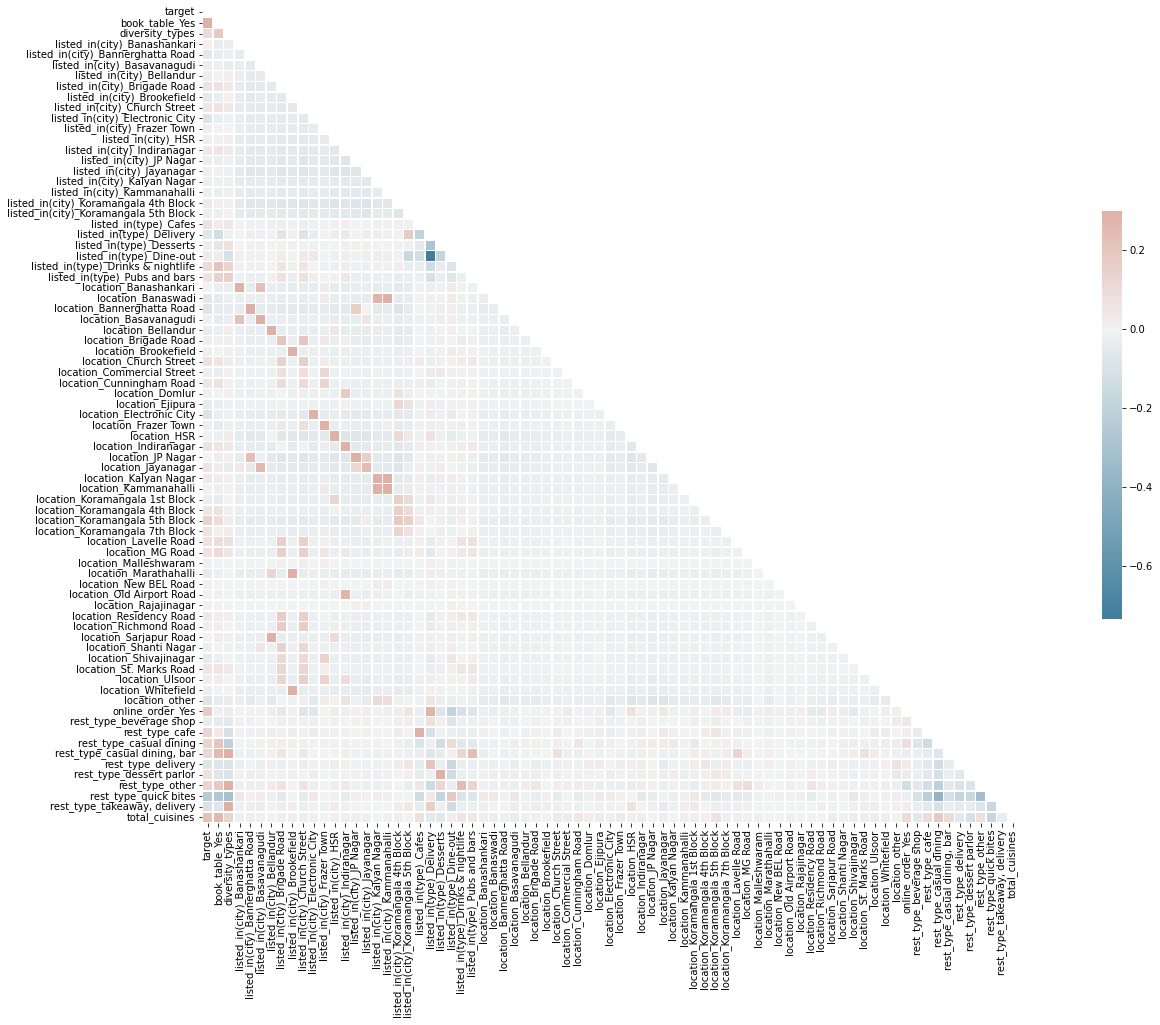

In [73]:
dframe = data_final[["target"] + x_train.columns.tolist()]
dframe = dframe.iloc[:x_train.shape[0]]
corr = dframe.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(x_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(x_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(x_val, y_val)))

R^2 Training Score: 0.61 
OOB Score: 0.33 
R^2 Validation Score: 0.32


In [75]:
from sklearn.base import clone 

#https://gist.github.com/egemenzeytinci/36a960c884d4509037d54ba5449a327f

def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)

    return df


def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    importances = []

    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [76]:
dframe = drop_col_feat_imp(rf, x_train, y_train)

In [80]:
dframe

,Importance
Feature,
total_cuisines,0.144986
online_order_Yes,0.078922
book_table_Yes,0.043273
location_Koramangala 5th Block,0.012126
location_other,0.010986
diversity_types,0.009674
rest_type_dessert parlor,0.008608
location_Koramangala 7th Block,0.008593
location_Jayanagar,0.007096
